<a href="https://colab.research.google.com/github/katkat13/AI/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de librerias a usar

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, LabelEncoder, RobustScaler

Acceso al df y arreglo del mismo

Descargar el dataset desde: https://www.kaggle.com/datasets/danieleduardofajardo/colombia-house-prediction

In [ ]:
url="/content/Sales_prediction_Colombia - Sales_prediction_Colombia.csv"
df_ventas = pd.read_csv(url, sep=",", header=0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             145552 non-null  int64  
 1   antiguedad_original    145552 non-null  object 
 2   area                   145528 non-null  float64
 3   areabalcon             24357 non-null   float64
 4   areaconstruida         145528 non-null  float64
 5   areaterraza            24357 non-null   float64
 6   balcon                 78145 non-null   object 
 7   banos                  145016 non-null  float64
 8   banoservicio           1116 non-null    object 
 9   conjuntocerrado        67528 non-null   object 
 10  cuarto_de_escoltas     3734 non-null    object 
 11  cuartodeservicio       28343 non-null   object 
 12  depositoocuartoutil    57456 non-null   object 
 13  depositos              41538 non-null   object 
 14  estrato                138885 non-nu

Seleccion de variables que se toman para el estudio

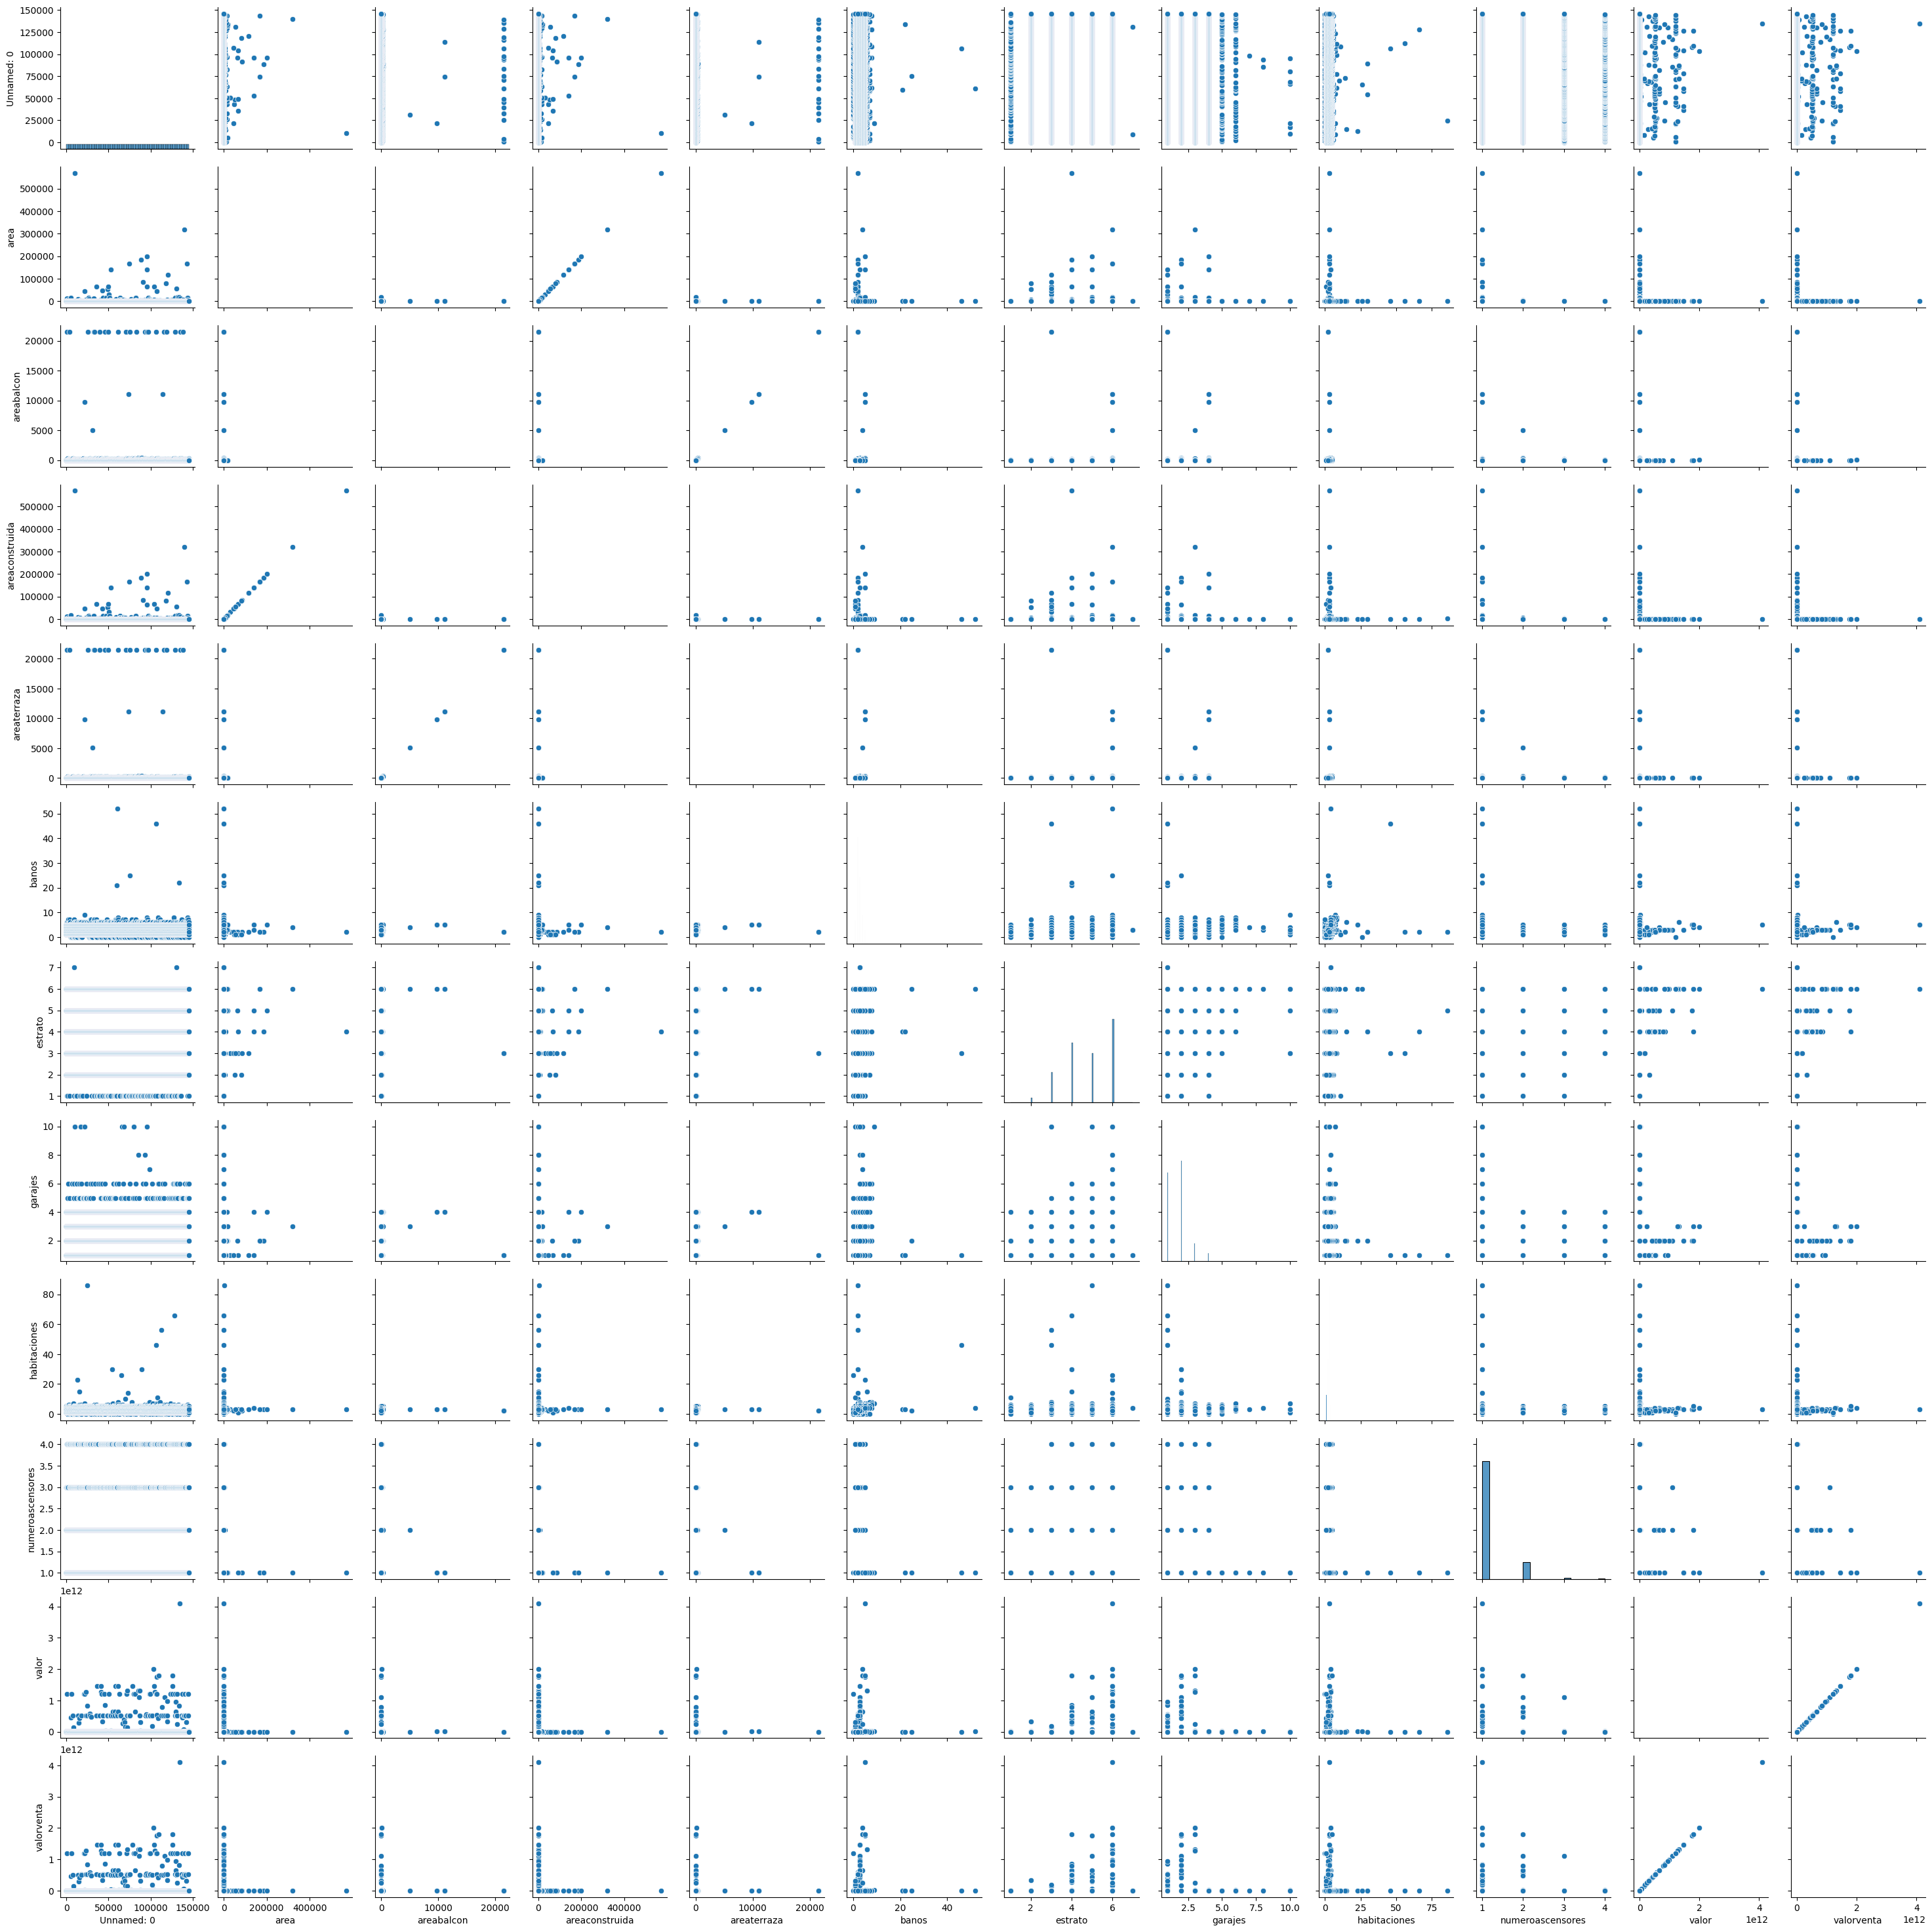

In [ ]:
# Eliminar las columnas no numéricas (por ejemplo, nombres, IDs, etc.)
df_numeric = df_ventas.select_dtypes(include=['float64', 'int64'])

# Añadir la columna de ventas al DataFrame numérico
df_numeric['valor'] = df_ventas['valor']

# Crear la matriz de dispersión
sns.pairplot(df_numeric)
plt.show()

In [ ]:
cdf=df_ventas[['area','areabalcon', 'areaconstruida','areaterraza','banos','conjuntocerrado','estrato','gimnasio', 'habitaciones','jacuzzi','garajes','numeroascensores','piscina','valor']]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   area              145528 non-null  float64
 1   areabalcon        24357 non-null   float64
 2   areaconstruida    145528 non-null  float64
 3   areaterraza       24357 non-null   float64
 4   banos             145016 non-null  float64
 5   conjuntocerrado   67528 non-null   object 
 6   estrato           138885 non-null  float64
 7   gimnasio          40744 non-null   object 
 8   habitaciones      145540 non-null  float64
 9   jacuzzi           6080 non-null    object 
 10  garajes           131688 non-null  float64
 11  numeroascensores  83635 non-null   float64
 12  piscina           12347 non-null   object 
 13  valor             145552 non-null  float64
dtypes: float64(10), object(4)
memory usage: 15.5+ MB


In [ ]:
cdf.describe()

,area,areabalcon,areaconstruida,areaterraza,banos,estrato,habitaciones,garajes,numeroascensores,valor
count,145528.000000,24357.000000,145528.000000,24357.000000,145016.000000,138885.000000,145540.000000,131688.000000,83635.000000,1.455520e+05
mean,137.033261,37.349768,137.033261,37.349768,2.593004,4.768557,2.606651,1.750683,1.156585,1.401152e+09
std,2130.744767,643.118618,2130.744767,643.118618,1.029160,1.146063,0.865364,0.773695,0.421766,2.829434e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,66.980000,3.000000,66.980000,3.000000,2.000000,4.000000,2.000000,1.000000,1.000000,3.200000e+08
50%,92.000000,5.000000,92.000000,5.000000,2.000000,5.000000,3.000000,2.000000,1.000000,4.900000e+08
75%,138.000000,16.000000,138.000000,16.000000,3.000000,6.000000,3.000000,2.000000,1.000000,8.200000e+08
max,570000.000000,21502.000000,570000.000000,21502.000000,52.000000,7.000000,86.000000,10.000000,4.000000,4.100000e+12


Proceso para eliminacion de filas que tienen datos nulos

In [ ]:
cdf.isnull().sum()

area                    24
areabalcon          121195
areaconstruida          24
areaterraza         121195
banos                  536
conjuntocerrado      78024
estrato               6667
gimnasio            104808
habitaciones            12
jacuzzi             139472
garajes              13864
numeroascensores     61917
piscina             133205
valor                    0
dtype: int64

In [ ]:
ncdf=cdf.copy()
ncdf['area']=cdf['area'].fillna(cdf['area'].median())
ncdf['areaconstruida']=cdf['areaconstruida'].fillna(0)
ncdf['areabalcon']=cdf['areabalcon'].fillna(0)
ncdf['areaterraza']=cdf['areaterraza'].fillna(0)
ncdf['banos']=cdf['banos'].fillna(0)
ncdf['estrato']=cdf['estrato'].fillna(0)
ncdf['habitaciones']=cdf['habitaciones'].fillna(0)
ncdf['garajes']=cdf['garajes'].fillna(0)
ncdf['numeroascensores']=cdf['numeroascensores'].fillna(0)
ncdf.isnull().sum()

area                     0
areabalcon               0
areaconstruida           0
areaterraza              0
banos                    0
conjuntocerrado      78024
estrato                  0
gimnasio            104808
habitaciones             0
jacuzzi             139472
garajes                  0
numeroascensores         0
piscina             133205
valor                    0
dtype: int64

In [ ]:
# ncdf=cdf.dropna(subset=['area','areaconstruida','banos','estrato', 'habitaciones','garajes', 'valor'])
ncdf['conjuntocerrado']=cdf['conjuntocerrado'].fillna('No')
ncdf['gimnasio']=cdf['gimnasio'].fillna('No')
ncdf['jacuzzi']=cdf['jacuzzi'].fillna('No')
ncdf['piscina']=cdf['piscina'].fillna('No')
ncdf.isnull().sum()

area                0
areabalcon          0
areaconstruida      0
areaterraza         0
banos               0
conjuntocerrado     0
estrato             0
gimnasio            0
habitaciones        0
jacuzzi             0
garajes             0
numeroascensores    0
piscina             0
valor               0
dtype: int64

In [ ]:
ncdf.isnull().sum()

area                0
areabalcon          0
areaconstruida      0
areaterraza         0
banos               0
conjuntocerrado     0
estrato             0
gimnasio            0
habitaciones        0
jacuzzi             0
garajes             0
numeroascensores    0
piscina             0
valor               0
dtype: int64

Tratamiento de valores Nan

In [ ]:
numericas = ['area','areabalcon', 'areaconstruida','areaterraza','banos', 'estrato','habitaciones','garajes', 'numeroascensores']
percentile_up = ncdf[numericas].quantile(0.005)
percentile_down = ncdf[numericas].quantile(0.95)
ncdf[numericas] = ncdf[numericas][(ncdf[numericas] >= percentile_up) & (ncdf[numericas] <= percentile_down)]

In [ ]:
ncdf = ncdf.dropna()

In [ ]:
ncdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128125 entries, 0 to 145551
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   area              128125 non-null  float64
 1   areabalcon        128125 non-null  float64
 2   areaconstruida    128125 non-null  float64
 3   areaterraza       128125 non-null  float64
 4   banos             128125 non-null  float64
 5   conjuntocerrado   128125 non-null  object 
 6   estrato           128125 non-null  float64
 7   gimnasio          128125 non-null  object 
 8   habitaciones      128125 non-null  float64
 9   jacuzzi           128125 non-null  object 
 10  garajes           128125 non-null  float64
 11  numeroascensores  128125 non-null  float64
 12  piscina           128125 non-null  object 
 13  valor             128125 non-null  float64
dtypes: float64(10), object(4)
memory usage: 14.7+ MB


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ncdf['conjuntocerrado-cd'] = labelencoder.fit_transform(ncdf['conjuntocerrado'])
ncdf

,area,areabalcon,areaconstruida,areaterraza,banos,conjuntocerrado,estrato,gimnasio,habitaciones,jacuzzi,garajes,numeroascensores,piscina,valor,conjuntocerrado-cd
0,145.0,10.0,145.0,10.0,3.0,No,6.0,No,3.0,No,2.0,2.0,No,900000000.0,0
1,114.0,0.0,114.0,0.0,3.0,No,4.0,No,3.0,No,0.0,0.0,No,548147500.0,0
3,61.0,0.0,61.0,0.0,1.0,No,6.0,No,1.0,No,1.0,1.0,No,495000000.0,0
4,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0
5,56.0,0.0,56.0,0.0,1.0,No,5.0,No,1.0,No,1.0,0.0,No,250000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145544,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0
145547,118.0,0.0,118.0,0.0,3.0,No,5.0,No,3.0,No,1.0,0.0,No,800000000.0,0
145548,89.0,10.0,89.0,10.0,3.0,No,3.0,No,3.0,No,1.0,0.0,No,320000000.0,0
145549,88.0,0.0,88.0,0.0,3.0,No,6.0,No,2.0,No,2.0,0.0,No,950000000.0,0


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ncdf['gimnasio-cd'] = labelencoder.fit_transform(ncdf['gimnasio'])
ncdf

,area,areabalcon,areaconstruida,areaterraza,banos,conjuntocerrado,estrato,gimnasio,habitaciones,jacuzzi,garajes,numeroascensores,piscina,valor,conjuntocerrado-cd,gimnasio-cd
0,145.0,10.0,145.0,10.0,3.0,No,6.0,No,3.0,No,2.0,2.0,No,900000000.0,0,0
1,114.0,0.0,114.0,0.0,3.0,No,4.0,No,3.0,No,0.0,0.0,No,548147500.0,0,0
3,61.0,0.0,61.0,0.0,1.0,No,6.0,No,1.0,No,1.0,1.0,No,495000000.0,0,0
4,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0
5,56.0,0.0,56.0,0.0,1.0,No,5.0,No,1.0,No,1.0,0.0,No,250000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145544,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0
145547,118.0,0.0,118.0,0.0,3.0,No,5.0,No,3.0,No,1.0,0.0,No,800000000.0,0,0
145548,89.0,10.0,89.0,10.0,3.0,No,3.0,No,3.0,No,1.0,0.0,No,320000000.0,0,0
145549,88.0,0.0,88.0,0.0,3.0,No,6.0,No,2.0,No,2.0,0.0,No,950000000.0,0,0


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ncdf['jacuzzi-cd'] = labelencoder.fit_transform(ncdf['jacuzzi'])
ncdf

,area,areabalcon,areaconstruida,areaterraza,banos,conjuntocerrado,estrato,gimnasio,habitaciones,jacuzzi,garajes,numeroascensores,piscina,valor,conjuntocerrado-cd,gimnasio-cd,jacuzzi-cd
0,145.0,10.0,145.0,10.0,3.0,No,6.0,No,3.0,No,2.0,2.0,No,900000000.0,0,0,0
1,114.0,0.0,114.0,0.0,3.0,No,4.0,No,3.0,No,0.0,0.0,No,548147500.0,0,0,0
3,61.0,0.0,61.0,0.0,1.0,No,6.0,No,1.0,No,1.0,1.0,No,495000000.0,0,0,0
4,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0,0
5,56.0,0.0,56.0,0.0,1.0,No,5.0,No,1.0,No,1.0,0.0,No,250000000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145544,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0,0
145547,118.0,0.0,118.0,0.0,3.0,No,5.0,No,3.0,No,1.0,0.0,No,800000000.0,0,0,0
145548,89.0,10.0,89.0,10.0,3.0,No,3.0,No,3.0,No,1.0,0.0,No,320000000.0,0,0,0
145549,88.0,0.0,88.0,0.0,3.0,No,6.0,No,2.0,No,2.0,0.0,No,950000000.0,0,0,0


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ncdf['piscina-cd'] = labelencoder.fit_transform(ncdf['piscina'])
ncdf

,area,areabalcon,areaconstruida,areaterraza,banos,conjuntocerrado,estrato,gimnasio,habitaciones,jacuzzi,garajes,numeroascensores,piscina,valor,conjuntocerrado-cd,gimnasio-cd,jacuzzi-cd,piscina-cd
0,145.0,10.0,145.0,10.0,3.0,No,6.0,No,3.0,No,2.0,2.0,No,900000000.0,0,0,0,0
1,114.0,0.0,114.0,0.0,3.0,No,4.0,No,3.0,No,0.0,0.0,No,548147500.0,0,0,0,0
3,61.0,0.0,61.0,0.0,1.0,No,6.0,No,1.0,No,1.0,1.0,No,495000000.0,0,0,0,0
4,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0,0,0
5,56.0,0.0,56.0,0.0,1.0,No,5.0,No,1.0,No,1.0,0.0,No,250000000.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145544,120.5,0.0,120.5,0.0,3.0,No,0.0,No,2.0,No,2.0,0.0,No,850000000.0,0,0,0,0
145547,118.0,0.0,118.0,0.0,3.0,No,5.0,No,3.0,No,1.0,0.0,No,800000000.0,0,0,0,0
145548,89.0,10.0,89.0,10.0,3.0,No,3.0,No,3.0,No,1.0,0.0,No,320000000.0,0,0,0,0
145549,88.0,0.0,88.0,0.0,3.0,No,6.0,No,2.0,No,2.0,0.0,No,950000000.0,0,0,0,0


In [ ]:
ncdf.drop(columns=['conjuntocerrado', 'gimnasio','jacuzzi','piscina'], inplace = True)
ncdf

,area,areabalcon,areaconstruida,areaterraza,banos,estrato,habitaciones,garajes,numeroascensores,valor
0,145.0,10.0,145.0,10.0,3.0,6.0,3.0,2.0,2.0,900000000.0
1,114.0,0.0,114.0,0.0,3.0,4.0,3.0,0.0,0.0,548147500.0
3,61.0,0.0,61.0,0.0,1.0,6.0,1.0,1.0,1.0,495000000.0
4,120.5,0.0,120.5,0.0,3.0,0.0,2.0,2.0,0.0,850000000.0
5,56.0,0.0,56.0,0.0,1.0,5.0,1.0,1.0,0.0,250000000.0
...,...,...,...,...,...,...,...,...,...,...
145544,120.5,0.0,120.5,0.0,3.0,0.0,2.0,2.0,0.0,850000000.0
145547,118.0,0.0,118.0,0.0,3.0,5.0,3.0,1.0,0.0,800000000.0
145548,89.0,10.0,89.0,10.0,3.0,3.0,3.0,1.0,0.0,320000000.0
145549,88.0,0.0,88.0,0.0,3.0,6.0,2.0,2.0,0.0,950000000.0


Normalizacion de datos

In [ ]:
ncdf.describe()

,area,areabalcon,areaconstruida,areaterraza,banos,estrato,habitaciones,garajes,numeroascensores,valor,conjuntocerrado-cd,gimnasio-cd,jacuzzi-cd,piscina-cd
count,128125.000000,128125.000000,128125.000000,128125.000000,128125.000000,128125.000000,128125.000000,128125.000000,128125.000000,1.281250e+05,128125.000000,128125.000000,128125.000000,128125.000000
mean,99.956095,0.575208,99.956095,0.575208,2.453292,4.445643,2.545577,1.445331,0.626950,8.726990e+08,0.465225,0.465225,0.465225,0.465225
std,47.226261,1.825783,47.226261,1.825783,0.899954,1.498969,0.745906,0.745703,0.607098,1.621592e+10,0.498791,0.498791,0.498791,0.498791
min,20.000000,0.000000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,65.000000,0.000000,65.000000,0.000000,2.000000,4.000000,2.000000,1.000000,0.000000,3.000000e+08,0.000000,0.000000,0.000000,0.000000
50%,87.000000,0.000000,87.000000,0.000000,2.000000,5.000000,3.000000,1.000000,1.000000,4.500000e+08,0.000000,0.000000,0.000000,0.000000
75%,124.000000,0.000000,124.000000,0.000000,3.000000,6.000000,3.000000,2.000000,1.000000,7.000000e+08,1.000000,1.000000,1.000000,1.000000
max,265.000000,12.000000,265.000000,12.000000,5.000000,6.000000,4.000000,3.000000,2.000000,1.750000e+12,1.000000,1.000000,1.000000,1.000000


In [ ]:
maximos=ncdf.max()
maximos

area                  2.650000e+02
areabalcon            1.200000e+01
areaconstruida        2.650000e+02
areaterraza           1.200000e+01
banos                 5.000000e+00
estrato               6.000000e+00
habitaciones          4.000000e+00
garajes               3.000000e+00
numeroascensores      2.000000e+00
valor                 1.750000e+12
conjuntocerrado-cd    1.000000e+00
gimnasio-cd           1.000000e+00
jacuzzi-cd            1.000000e+00
piscina-cd            1.000000e+00
dtype: float64

In [ ]:
maximos=ncdf.min()
maximos

area                  20.0
areabalcon             0.0
areaconstruida        20.0
areaterraza            0.0
banos                  1.0
estrato                0.0
habitaciones           1.0
garajes                0.0
numeroascensores       0.0
valor                  0.0
conjuntocerrado-cd     0.0
gimnasio-cd            0.0
jacuzzi-cd             0.0
piscina-cd             0.0
dtype: float64

In [ ]:
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

In [ ]:
ncdf = minmax_norm(ncdf)

Asignacion de datos con 70% para entrenar y 30% para probar

In [ ]:
train, test = train_test_split(ncdf, test_size=0.3)

In [ ]:
xtrain=train[['area','areabalcon', 'areaconstruida','areaterraza','banos','estrato','habitaciones','garajes','numeroascensores']]
#,'conjuntocerrado-cd','gimnasio-cd', ,'piscina-cd','jacuzzi-cd'
print(xtrain)

            area  areabalcon  areaconstruida  areaterraza  banos   estrato  \
98870   0.400000    0.000000        0.400000     0.000000   0.75  0.666667   
136686  0.093878    0.000000        0.093878     0.000000   0.25  0.666667   
28022   0.151020    0.166667        0.151020     0.166667   0.25  0.666667   
96979   0.395918    0.250000        0.395918     0.250000   0.50  0.666667   
118946  0.216327    0.000000        0.216327     0.000000   0.25  0.500000   
...          ...         ...             ...          ...    ...       ...   
43196   0.351020    0.000000        0.351020     0.000000   0.25  0.833333   
94784   0.177347    0.000000        0.177347     0.000000   0.25  0.500000   
40583   0.195918    0.000000        0.195918     0.000000   0.25  0.833333   
11405   0.281633    0.250000        0.281633     0.250000   0.50  1.000000   
35784   0.122449    0.000000        0.122449     0.000000   0.25  0.500000   

        habitaciones   garajes  numeroascensores  
98870       

Pasar el db de prueba y test a rango de 0 a 1 con numpy

In [ ]:
xtrain=xtrain.to_numpy()
print(xtrain)

[[0.4        0.         0.4        ... 0.66666667 0.33333333 0.        ]
 [0.09387755 0.         0.09387755 ... 0.         0.33333333 0.        ]
 [0.15102041 0.16666667 0.15102041 ... 0.         0.33333333 1.        ]
 ...
 [0.19591837 0.         0.19591837 ... 0.         0.66666667 0.        ]
 [0.28163265 0.25       0.28163265 ... 0.33333333 0.66666667 0.5       ]
 [0.12244898 0.         0.12244898 ... 0.33333333 0.33333333 0.        ]]


In [ ]:
ytrain=train[["valor"]]
ytrain=ytrain.to_numpy()
ytrain=ytrain.ravel()
print(ytrain)

[0.00027429 0.00016571 0.00018286 ... 0.00034857 0.00032    0.00017143]


In [ ]:
xtest=test[['area','areabalcon', 'areaconstruida','areaterraza','banos','estrato','habitaciones','garajes','numeroascensores']]
print(xtest)

            area  areabalcon  areaconstruida  areaterraza  banos   estrato  \
31397   0.303673    0.333333        0.303673     0.333333   0.25  0.666667   
121289  0.400000    0.000000        0.400000     0.000000   0.50  1.000000   
131705  0.163265    0.000000        0.163265     0.000000   0.25  0.666667   
57909   0.595918    0.000000        0.595918     0.000000   0.50  0.833333   
139009  0.167347    0.000000        0.167347     0.000000   0.25  0.500000   
...          ...         ...             ...          ...    ...       ...   
16318   0.165184    0.000000        0.165184     0.000000   0.25  0.666667   
143351  0.228571    0.000000        0.228571     0.000000   0.25  0.666667   
52460   0.201020    0.000000        0.201020     0.000000   0.25  0.000000   
64745   0.212245    0.000000        0.212245     0.000000   0.50  0.666667   
49463   0.106122    0.000000        0.106122     0.000000   0.00  0.500000   

        habitaciones   garajes  numeroascensores  
31397       

In [ ]:
xtest=xtest.to_numpy()
print(xtest)

[[0.30367347 0.33333333 0.30367347 ... 0.66666667 0.66666667 1.        ]
 [0.4        0.         0.4        ... 0.66666667 0.66666667 0.5       ]
 [0.16326531 0.         0.16326531 ... 0.33333333 0.66666667 0.5       ]
 ...
 [0.20102041 0.         0.20102041 ... 0.66666667 0.33333333 0.        ]
 [0.2122449  0.         0.2122449  ... 0.66666667 0.33333333 0.5       ]
 [0.10612245 0.         0.10612245 ... 0.66666667 0.         0.        ]]


In [ ]:
ytest=test[["valor"]]
ytest=ytest.to_numpy()
ytest=ytest.ravel()
print(ytest)

[2.67428571e-04 3.60000000e-04 1.77142857e-04 ... 1.15428571e-04
 2.00000000e-04 8.57142857e-05]


Se entrena la red neuronal donde es un problema de regresion, se trata de predecir el precio

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(solver='adam', activation='logistic', alpha=0.0001,tol=1e-10,
                    hidden_layer_sizes=(5, 3, 1),learning_rate='constant',
                    learning_rate_init=0.001, max_iter=50, momentum=0.9, verbose=True)

reg.fit(xtrain,ytrain)

Iteration 1, loss = 0.40181007
Iteration 2, loss = 0.08056329
Iteration 3, loss = 0.01416151
Iteration 4, loss = 0.00161503
Iteration 5, loss = 0.00014406
Iteration 6, loss = 0.00005568
Iteration 7, loss = 0.00005333
Iteration 8, loss = 0.00005329
Iteration 9, loss = 0.00005327
Iteration 10, loss = 0.00005324
Iteration 11, loss = 0.00005320
Iteration 12, loss = 0.00005316
Iteration 13, loss = 0.00005311
Iteration 14, loss = 0.00005305
Iteration 15, loss = 0.00005298
Iteration 16, loss = 0.00005290
Iteration 17, loss = 0.00005281
Iteration 18, loss = 0.00005272
Iteration 19, loss = 0.00005261
Iteration 20, loss = 0.00005249
Iteration 21, loss = 0.00005235
Iteration 22, loss = 0.00005221
Iteration 23, loss = 0.00005207
Iteration 24, loss = 0.00005188
Iteration 25, loss = 0.00005169
Iteration 26, loss = 0.00005147
Iteration 27, loss = 0.00005130
Iteration 28, loss = 0.00005109
Iteration 29, loss = 0.00005088
Iteration 30, loss = 0.00005066
Iteration 31, loss = 0.00005048
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3, 1), max_iter=50,
             tol=1e-10, verbose=True)

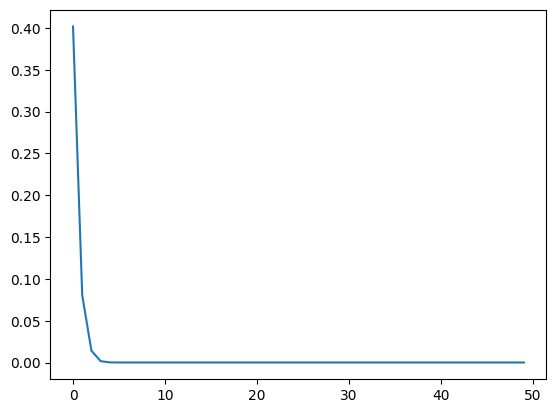

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reg.loss_curve_)

Calculo del error



---



In [ ]:
test_pred = reg.predict(xtest)
r_squared = r2_score(ytest, test_pred)
print(r_squared)

-0.004534294735050182


Ejemplo de utilización, se debe tener en cuenta que los valores se deben pasar y normalizados y el resultado (precio predicho) esta normalizado (en este caso como los mínimos son ceros el resultado se encuentra normalizado entre el máximo)


In [ ]:
actual=xtest[0]
print(actual)
#normalizar el area=121/128
#area construida_98/128
#banos=3/5
#estrato=3/6
#habitaciones=3/4
#garaje=2/3
#----
#normalizar el area=62/128
#area construida_62/128
#banos=2/5
#estrato=3/6
#habitaciones=2/4
#garaje=1/3

actual=[0.48,0.48,0.4,0.5,0.5,0.33]
respRNA=reg.predict([actual])
res=respRNA*1.900000e+09
print(format(res[0], '0.2f'))

[0.87903226 0.87903226 1.         1.         0.66666667 1.        ]
600937293.88
